In [1]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


mnist = fetch_openml('mnist_784', as_frame=False, parser='auto')

In [2]:
X = mnist.data
y = mnist.target

In [3]:
X_train, X_test, y_train, y_test = X[0:60000], X[60000:], y[0:60000], y[60000:]


In [4]:
from sklearn.svm import SVC

svm_clf = SVC(random_state=42, probability=True)
svm_clf.fit(X_train[:2000], y_train[:2000])

SVC(probability=True, random_state=42)

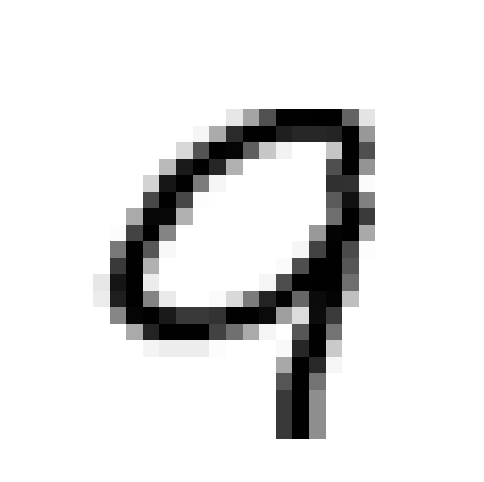

In [5]:

some_digit = X[3000]

def plot_digit(image_data):
    sns.set_style('white')
    plt.figure(figsize=(6,6))
    image = image_data.reshape(28,28)
    sns.heatmap(
        image,
        cmap='binary',
        cbar=False,
        xticklabels=False,
        yticklabels=False,
    )

    plt.axis('off')

plot_digit(some_digit)
plt.show()

In [6]:
svm_clf.predict([some_digit])

array(['9'], dtype=object)

In [7]:
svm_clf.predict_proba([some_digit])

array([[0.04290361, 0.00204848, 0.02724414, 0.00336455, 0.0433904 ,
        0.01829343, 0.00648588, 0.02053975, 0.00405813, 0.83167163]])

In [8]:
svm_clf.probA_

array([-4.64688095, -5.09581084, -4.99987479, -5.30978118, -5.14072672,
       -4.78570969, -5.44032969, -4.90266965, -4.40535429, -4.521282  ,
       -4.4841124 , -4.56101853, -4.6798657 , -4.73155035, -4.40866251,
       -4.07310384, -4.59056424, -5.17367873, -5.02339739, -5.0442915 ,
       -5.36091463, -5.13422379, -5.14571155, -5.0606578 , -5.37948363,
       -4.91892425, -5.44728341, -5.1759388 , -5.19389398, -4.12337731,
       -5.39611323, -5.20046054, -5.11211818, -5.31469698, -4.71964534,
       -4.89393818, -5.509518  , -5.99341633, -4.41852623, -5.20710217,
       -4.94502981, -5.23928678, -5.44284902, -4.31876883, -4.65028045])

In [9]:
svm_clf.decision_function([some_digit])

array([[ 7.24732084, -0.29826648,  6.23710953,  1.72942894,  8.26554417,
         4.18777932,  2.81973808,  5.04046908,  0.73776589,  9.29165402]])

In [10]:
digit_9_score = svm_clf.decision_function([some_digit])
class_id_9 = digit_9_score.argmax()

In [11]:
svm_clf.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [12]:
svm_clf.classes_[class_id_9]

'9'

In [13]:
from sklearn.multiclass import OneVsRestClassifier

ovr_clf = OneVsRestClassifier(SVC(random_state=42, probability=True))
ovr_clf.fit(X_train[:2000], y_train[:2000])

OneVsRestClassifier(estimator=SVC(probability=True, random_state=42))

In [14]:
ovr_clf.predict([some_digit])

array(['9'], dtype='<U1')

In [15]:
ovr_clf.estimators_

[SVC(probability=True, random_state=42),
 SVC(probability=True, random_state=42),
 SVC(probability=True, random_state=42),
 SVC(probability=True, random_state=42),
 SVC(probability=True, random_state=42),
 SVC(probability=True, random_state=42),
 SVC(probability=True, random_state=42),
 SVC(probability=True, random_state=42),
 SVC(probability=True, random_state=42),
 SVC(probability=True, random_state=42)]

In [16]:
ovr_clf.decision_function([some_digit])

array([[-0.67890985, -1.92110466, -1.02450134, -2.01557147, -0.96148102,
        -1.25049937, -1.35395964, -0.96591378, -1.68816539, -0.26501416]])

In [17]:
X


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(70000, 784))

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
X_train_scaled

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(60000, 784))

In [19]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)

In [20]:
from sklearn.model_selection import cross_val_score, cross_val_predict

# Compute scores for unscaled data
scores_unscaled = cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring='accuracy')
print("Accuracy scores with unscaled data:", scores_unscaled)
print("Mean accuracy (unscaled):", scores_unscaled.mean())

# Compute scores for scaled data
scores_scaled = cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring='accuracy')
print("Accuracy scores with scaled data:", scores_scaled)
print("Mean accuracy (scaled):", scores_scaled.mean())

Accuracy scores with unscaled data: [0.87365 0.85835 0.8689 ]
Mean accuracy (unscaled): 0.8669666666666668
Accuracy scores with scaled data: [0.8983 0.891  0.9018]
Mean accuracy (scaled): 0.8970333333333333


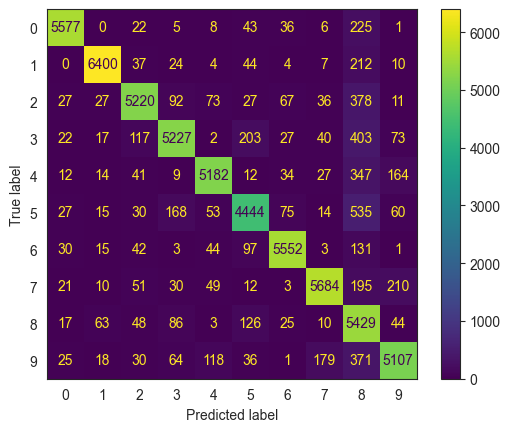

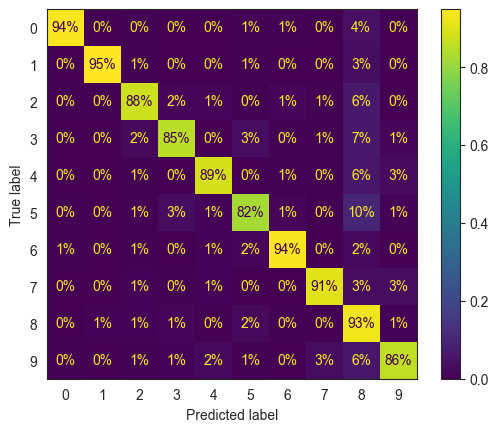

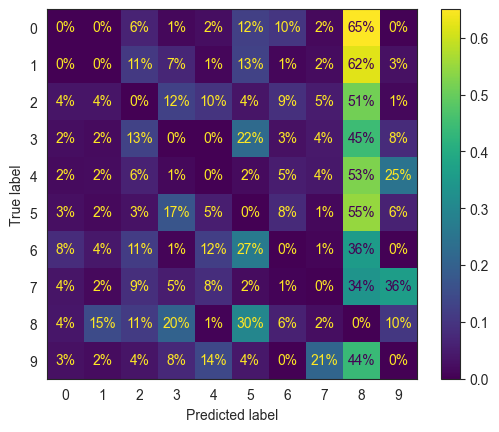

In [21]:
from sklearn.metrics import ConfusionMatrixDisplay

y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.show()

ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred,
                                        normalize="true", values_format=".0%")
plt.show()

sample_weight = (y_train_pred != y_train)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred,
                                        sample_weight=sample_weight,
                                        normalize="true", values_format=".0%")
plt.show()

Out of all 7s, 97% were correct and 3% wrong
Of that 3% that were wrong, 36% were mistakenly labeled as 9s

# Multilabel Classification

In [26]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= '7')
y_train_large

array([False, False, False, ..., False, False,  True], shape=(60000,))

In [28]:
y_train_odd = (y_train.astype('int8') % 2 == 1)
y_train_odd

array([ True, False, False, ...,  True, False, False], shape=(60000,))

In [30]:
y_multilabel = np.c_[y_train_large, y_train_odd]

In [31]:
y_multilabel

array([[False,  True],
       [False, False],
       [False, False],
       ...,
       [False,  True],
       [False, False],
       [ True, False]], shape=(60000, 2))

In [32]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [36]:
knn_clf.predict([some_digit])

array([[ True,  True]])

In [37]:
y_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)

In [38]:
y_knn_pred

array([[False,  True],
       [False, False],
       [False, False],
       ...,
       [False,  True],
       [False, False],
       [ True, False]], shape=(60000, 2))

In [39]:
from sklearn.metrics import f1_score
f1_score(y_multilabel, y_knn_pred, average="macro")

0.9764102655606048

In [ ]:
from sklearn.multioutput import ClassifierChain

chain_clf = ClassifierChain(SVC(), cv=3, random_state=42)
chain_clf.fit(X_train[:2000], y_multilabel[:2000])

In [ ]:
chain_clf.predict([some_digit])

# Multi output classification